In [1]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

Found 5 CSV files to analyze in d:\Github\part-of-speech-tagging\data\runs:

--- EDA for: bigram_dev.csv ---

1. DataFrame Head:
   id          word real pred
0   0           The   DT   DT
1   0       Arizona  NNP  NNP
2   0  Corporations  NNP  NNS
3   0    Commission  NNP  NNP
4   0    authorized  VBD  VBD

2. DataFrame Shape:
(131768, 4)

3. DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131768 entries, 0 to 131767
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      131768 non-null  int64 
 1   word    131767 non-null  object
 2   real    131768 non-null  object
 3   pred    131768 non-null  object
dtypes: int64(1), object(3)
memory usage: 4.0+ MB

4. Analysis of 'real' (Actual Tags):
  Number of unique 'real' tags: 38
  Top 10 most frequent 'real' tags:
real
NN     18538
IN     13651
NNP    13183
DT     11230
JJ      8094
NNS     8043
CD      5223
VBD     4621
RB      4171
VB      3503
Name: count,

C:\Users\david\AppData\Local\Temp\ipykernel_8992\3157220750.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_n_real.index, y=top_n_real.values, palette="viridis")


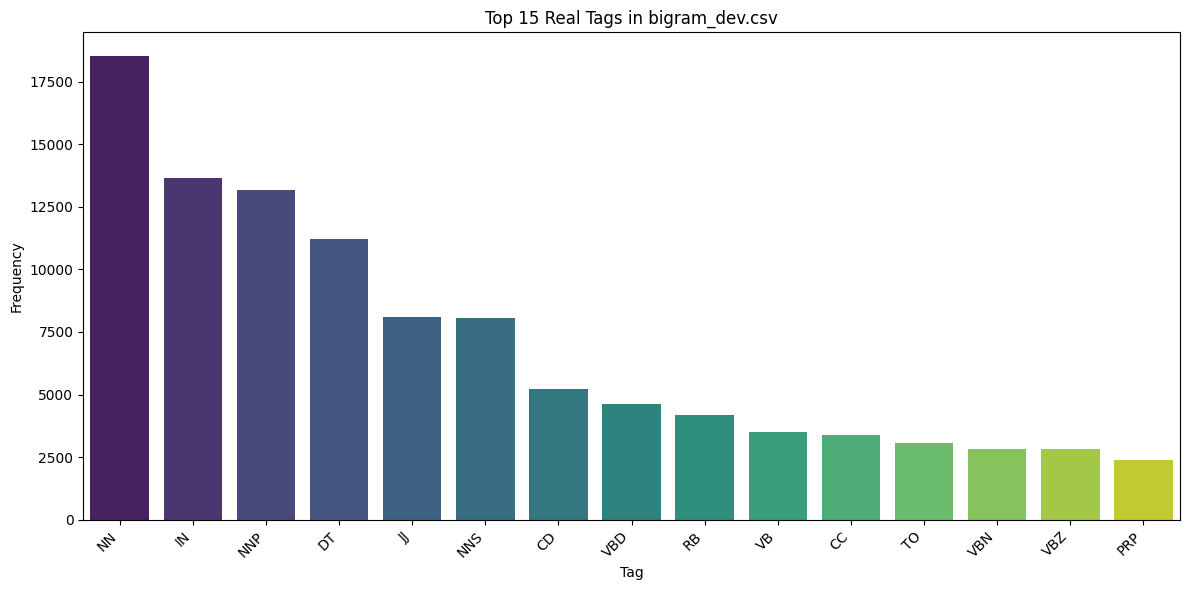

C:\Users\david\AppData\Local\Temp\ipykernel_8992\3157220750.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_n_pred.index, y=top_n_pred.values, palette="magma")


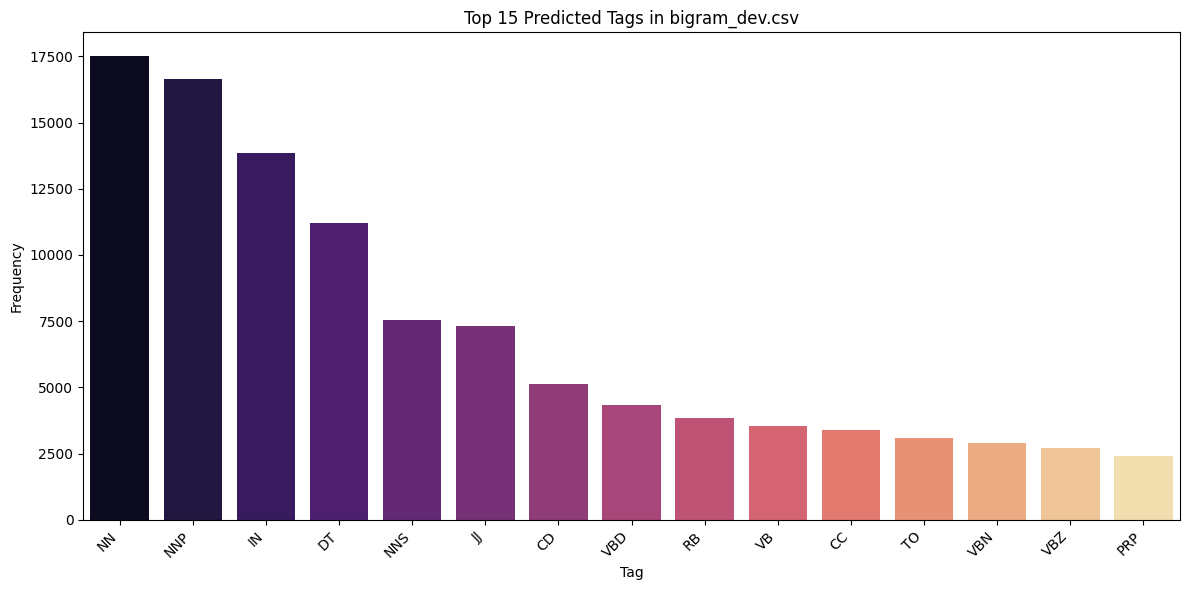



--- EDA for: tag_bigram_dev.csv ---

1. DataFrame Head:
   id          word real pred
0   0           The   DT   DT
1   0       Arizona  NNP  NNP
2   0  Corporations  NNP  NNS
3   0    Commission  NNP  NNP
4   0    authorized  VBD  VBD

2. DataFrame Shape:
(131768, 4)

3. DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131768 entries, 0 to 131767
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      131768 non-null  int64 
 1   word    131767 non-null  object
 2   real    131768 non-null  object
 3   pred    126369 non-null  object
dtypes: int64(1), object(3)
memory usage: 4.0+ MB

4. Analysis of 'real' (Actual Tags):
  Number of unique 'real' tags: 38
  Top 10 most frequent 'real' tags:
real
NN     18538
IN     13651
NNP    13183
DT     11230
JJ      8094
NNS     8043
CD      5223
VBD     4621
RB      4171
VB      3503
Name: count, dtype: int64
  Missing 'real' tags: 0

5. Analysis of 'pred' (Predicte

C:\Users\david\AppData\Local\Temp\ipykernel_8992\3157220750.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_n_real.index, y=top_n_real.values, palette="viridis")


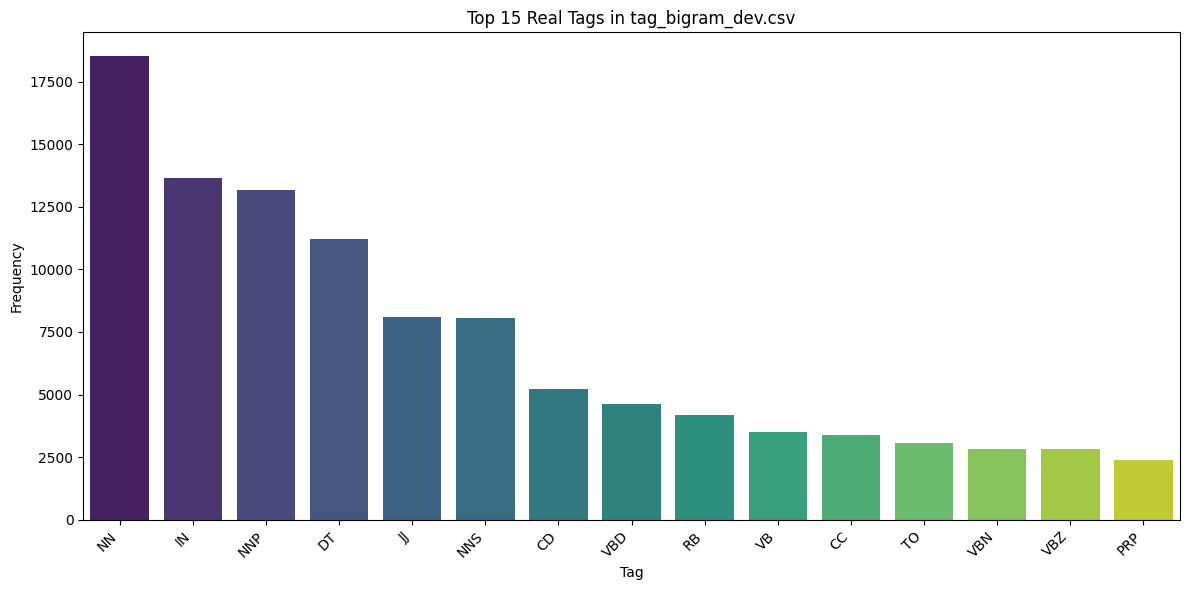

C:\Users\david\AppData\Local\Temp\ipykernel_8992\3157220750.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_n_pred.index, y=top_n_pred.values, palette="magma")


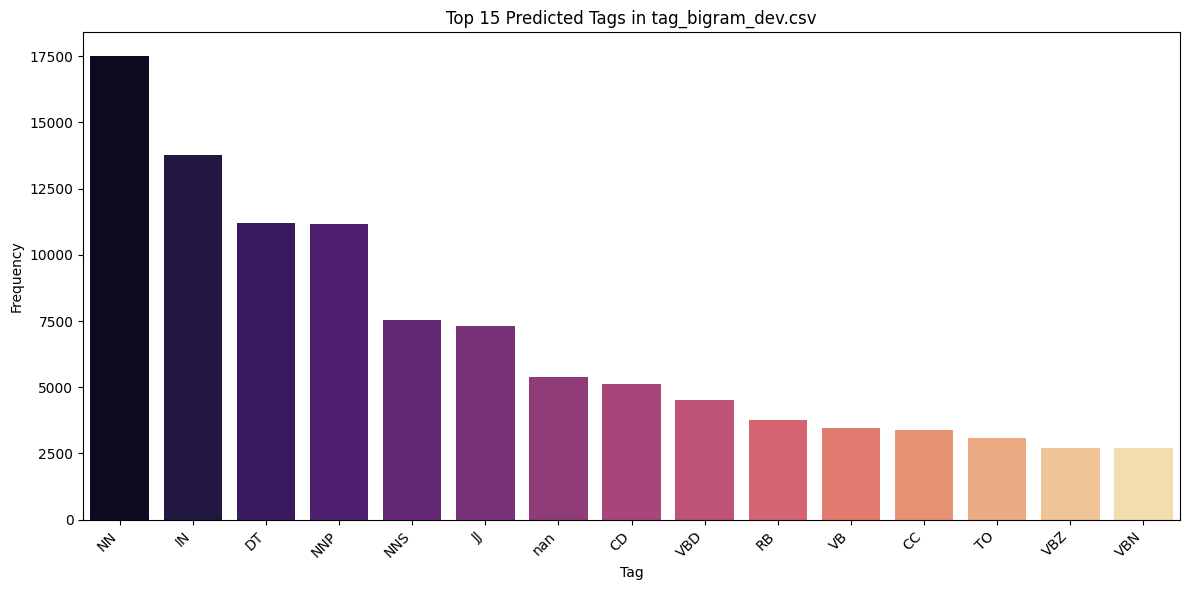



--- EDA for: tag_trigram_dev.csv ---

1. DataFrame Head:
   id          word real pred
0   0           The   DT   DT
1   0       Arizona  NNP  NNP
2   0  Corporations  NNP  NNS
3   0    Commission  NNP  NNP
4   0    authorized  VBD  VBD

2. DataFrame Shape:
(131768, 4)

3. DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131768 entries, 0 to 131767
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      131768 non-null  int64 
 1   word    131767 non-null  object
 2   real    131768 non-null  object
 3   pred    126351 non-null  object
dtypes: int64(1), object(3)
memory usage: 4.0+ MB

4. Analysis of 'real' (Actual Tags):
  Number of unique 'real' tags: 38
  Top 10 most frequent 'real' tags:
real
NN     18538
IN     13651
NNP    13183
DT     11230
JJ      8094
NNS     8043
CD      5223
VBD     4621
RB      4171
VB      3503
Name: count, dtype: int64
  Missing 'real' tags: 0

5. Analysis of 'pred' (Predict

C:\Users\david\AppData\Local\Temp\ipykernel_8992\3157220750.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_n_real.index, y=top_n_real.values, palette="viridis")


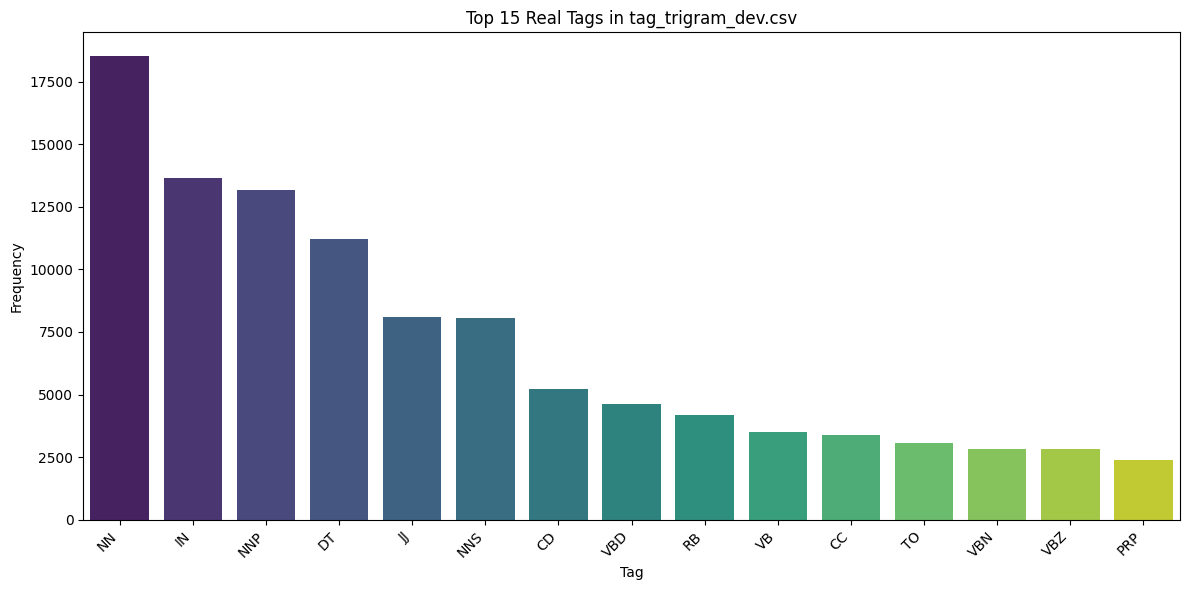

C:\Users\david\AppData\Local\Temp\ipykernel_8992\3157220750.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_n_pred.index, y=top_n_pred.values, palette="magma")


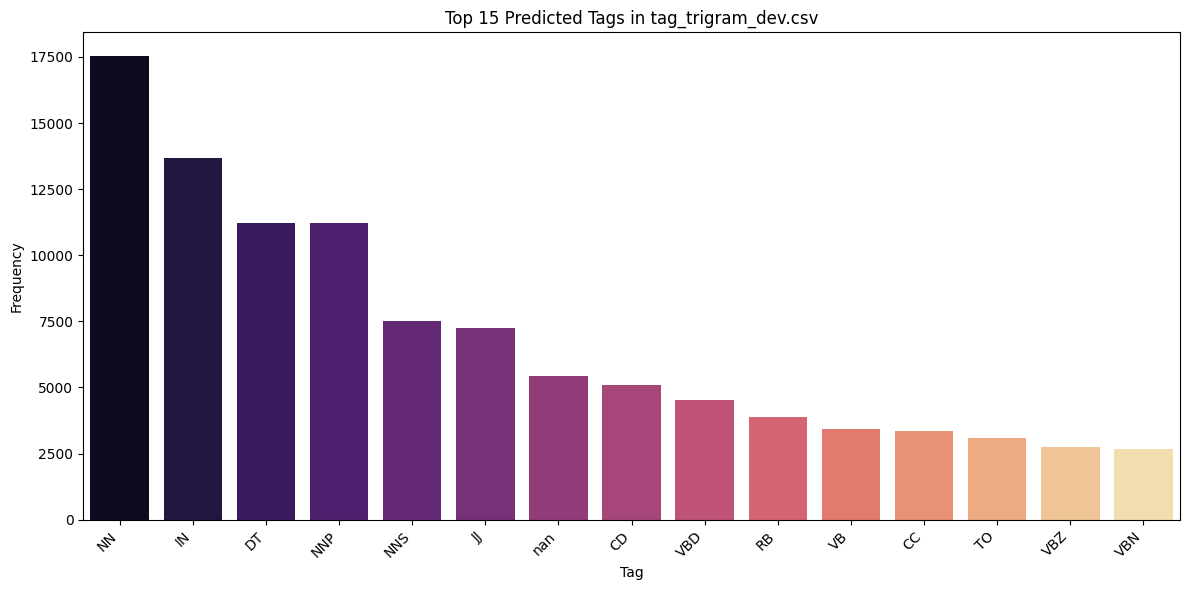



--- EDA for: trigram_dev.csv ---

1. DataFrame Head:
   id          word real pred
0   0           The   DT   DT
1   0       Arizona  NNP  NNP
2   0  Corporations  NNP  NNS
3   0    Commission  NNP  NNP
4   0    authorized  VBD  VBD

2. DataFrame Shape:
(131768, 4)

3. DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131768 entries, 0 to 131767
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      131768 non-null  int64 
 1   word    131767 non-null  object
 2   real    131768 non-null  object
 3   pred    126121 non-null  object
dtypes: int64(1), object(3)
memory usage: 4.0+ MB

4. Analysis of 'real' (Actual Tags):
  Number of unique 'real' tags: 38
  Top 10 most frequent 'real' tags:
real
NN     18538
IN     13651
NNP    13183
DT     11230
JJ      8094
NNS     8043
CD      5223
VBD     4621
RB      4171
VB      3503
Name: count, dtype: int64
  Missing 'real' tags: 0

5. Analysis of 'pred' (Predicted T

C:\Users\david\AppData\Local\Temp\ipykernel_8992\3157220750.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_n_real.index, y=top_n_real.values, palette="viridis")


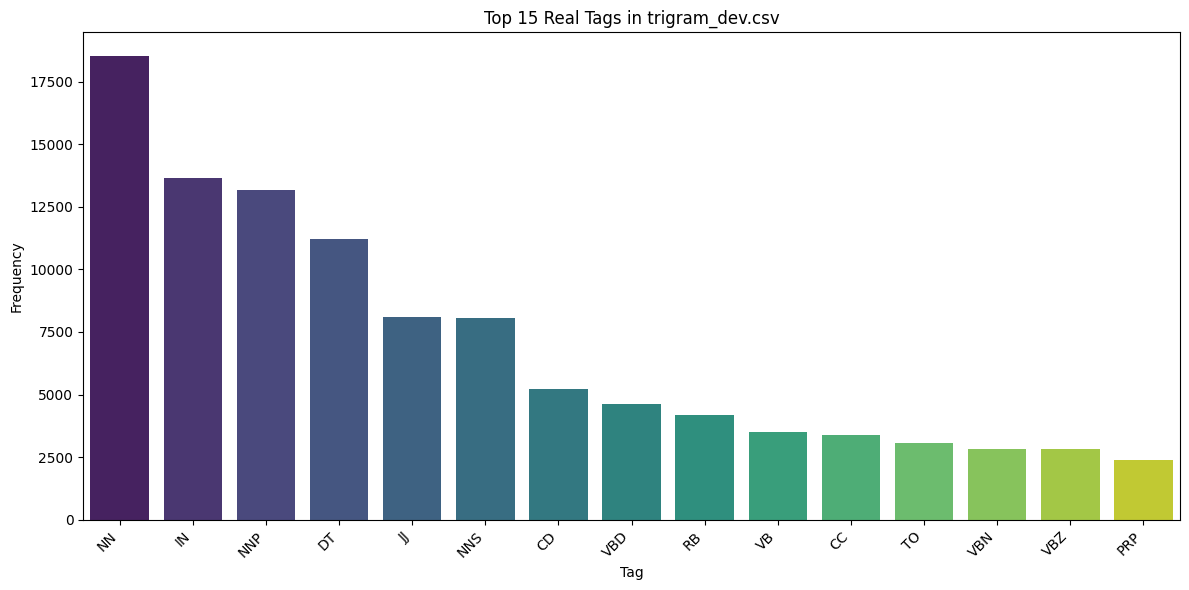

C:\Users\david\AppData\Local\Temp\ipykernel_8992\3157220750.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_n_pred.index, y=top_n_pred.values, palette="magma")


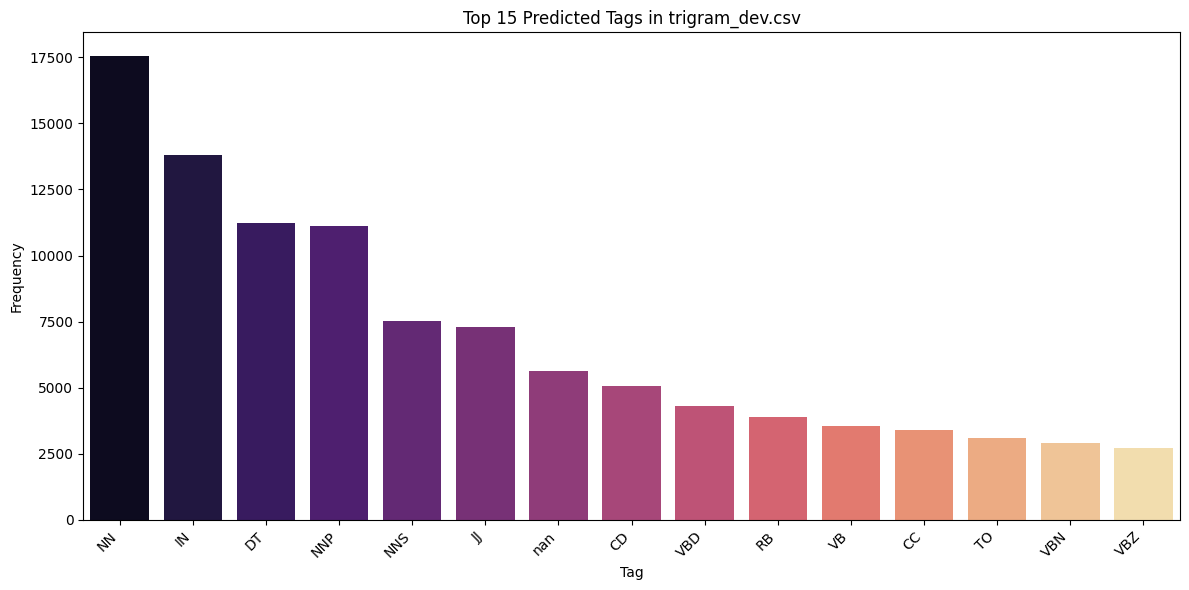



--- EDA for: unigram_dev.csv ---

1. DataFrame Head:
   id          word real pred
0   0           The   DT   DT
1   0       Arizona  NNP  NNP
2   0  Corporations  NNP  NNS
3   0    Commission  NNP  NNP
4   0    authorized  VBD  VBD

2. DataFrame Shape:
(131768, 4)

3. DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131768 entries, 0 to 131767
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      131768 non-null  int64 
 1   word    131767 non-null  object
 2   real    131768 non-null  object
 3   pred    131768 non-null  object
dtypes: int64(1), object(3)
memory usage: 4.0+ MB

4. Analysis of 'real' (Actual Tags):
  Number of unique 'real' tags: 38
  Top 10 most frequent 'real' tags:
real
NN     18538
IN     13651
NNP    13183
DT     11230
JJ      8094
NNS     8043
CD      5223
VBD     4621
RB      4171
VB      3503
Name: count, dtype: int64
  Missing 'real' tags: 0

5. Analysis of 'pred' (Predicted T

C:\Users\david\AppData\Local\Temp\ipykernel_8992\3157220750.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_n_real.index, y=top_n_real.values, palette="viridis")


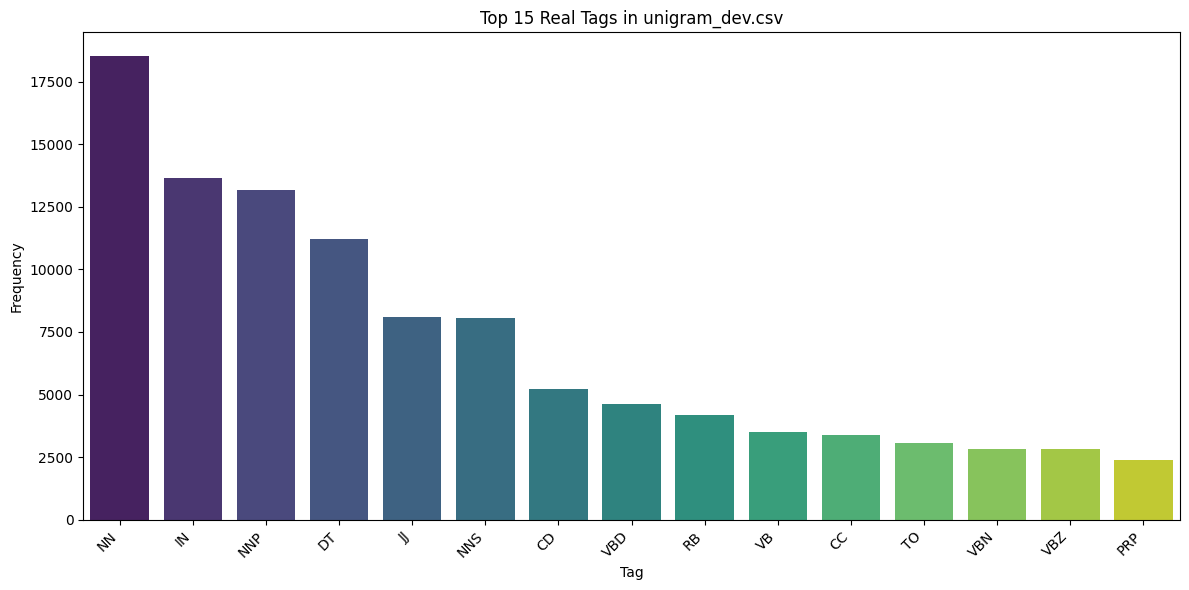

C:\Users\david\AppData\Local\Temp\ipykernel_8992\3157220750.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_n_pred.index, y=top_n_pred.values, palette="magma")


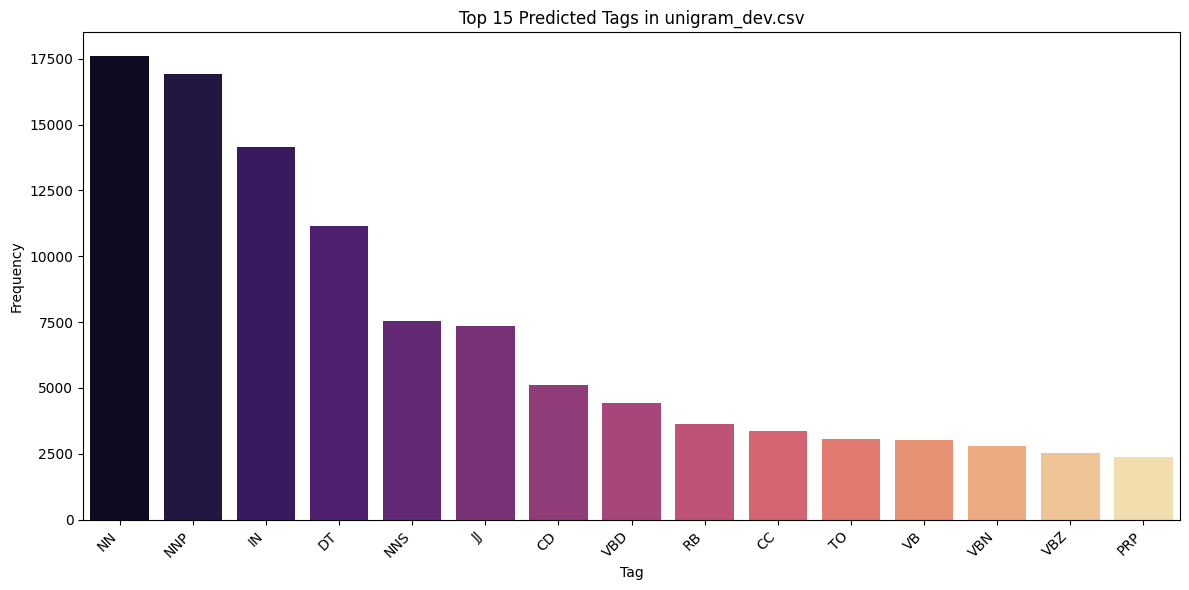

In [9]:
# Assuming this notebook is in the 'analysis' directory
runs_directory = '../data/runs/'
csv_files = glob.glob(os.path.join(runs_directory, '*.csv'))

# Characters/tags to potentially exclude from analysis if they are punctuation
# This list is based on your analysis/final.ipynb
chars_to_remove = [',', '``', "''", '.', ';', '#', '%', "'", '"', "$", ":", "(", ")"]


if not csv_files:
    print(f"No CSV files found in {os.path.abspath(runs_directory)}")
else:
    print(f"Found {len(csv_files)} CSV files to analyze in {os.path.abspath(runs_directory)}:\n")
    for file_path in csv_files:
        print(f"--- EDA for: {os.path.basename(file_path)} ---")
        try:
            df = pd.read_csv(file_path)

            print("\n1. DataFrame Head:")
            print(df.head())

            print("\n2. DataFrame Shape:")
            print(df.shape)

            print("\n3. DataFrame Info:")
            df.info()

            if 'real' not in df.columns or 'pred' not in df.columns:
                print(f"\nSkipping detailed analysis for {os.path.basename(file_path)}: Missing 'real' or 'pred' columns.")
                print("\n" + "="*70 + "\n")
                continue

            # Optional: Filter out rows where 'real' tag is a punctuation mark for cleaner tag analysis
            df = df[~df['real'].isin(chars_to_remove)].copy()
            # If you use df_filtered, replace df with df_filtered in subsequent steps for 'real' and 'pred' analysis
            # For this simple EDA, we'll use the original df and be aware punctuation might be in tag counts.

            print("\n4. Analysis of 'real' (Actual Tags):")
            df['real'] = df['real'].astype(str) # Ensure string type
            print(f"  Number of unique 'real' tags: {df['real'].nunique()}")
            print("  Top 10 most frequent 'real' tags:")
            print(df['real'].value_counts().nlargest(10))
            print(f"  Missing 'real' tags: {df['real'].isnull().sum()}")

            print("\n5. Analysis of 'pred' (Predicted Tags):")
            df['pred'] = df['pred'].astype(str) # Ensure string type
            print(f"  Number of unique 'pred' tags: {df['pred'].nunique()}")
            print("  Top 10 most frequent 'pred' tags:")
            print(df['pred'].value_counts().nlargest(10))
            print(f"  Missing 'pred' tags: {df['pred'].isnull().sum()}")
            
            # Consider rows where 'real' is not a punctuation mark for accuracy
            df_for_accuracy = df[~df['real'].isin(chars_to_remove)].copy()
            if not df_for_accuracy.empty:
                accuracy = accuracy_score(df_for_accuracy['real'], df_for_accuracy['pred'])
                print(f"\n6. Overall Accuracy (excluding punctuation in 'real'): {accuracy:.4f}")
            else:
                print("\n6. Overall Accuracy: Not enough data after filtering punctuation to calculate.")

            print(df.pred.value_counts())
            # Plotting top N real tags
            plt.figure(figsize=(12, 6))
            top_n_real = df['real'].value_counts().nlargest(15)
            sns.barplot(x=top_n_real.index, y=top_n_real.values, palette="viridis")
            plt.title(f'Top 15 Real Tags in {os.path.basename(file_path)}')
            plt.xlabel('Tag')
            plt.ylabel('Frequency')
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()

            # Plotting top N predicted tags
            plt.figure(figsize=(12, 6))
            top_n_pred = df['pred'].value_counts().nlargest(15)
            sns.barplot(x=top_n_pred.index, y=top_n_pred.values, palette="magma")
            plt.title(f'Top 15 Predicted Tags in {os.path.basename(file_path)}')
            plt.xlabel('Tag')
            plt.ylabel('Frequency')
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()

            print("\n" + "="*70 + "\n")

        except Exception as e:
            print(f"Error processing {os.path.basename(file_path)}: {e}")
            print("\n" + "="*70 + "\n")